<a href="https://colab.research.google.com/github/gautumsvp7/SolarDataSetPublic/blob/main/Solar_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving solar-energy-production-sites-1.csv to solar-energy-production-sites-1.csv


In [36]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  




In [37]:
df = pd.read_csv(io.BytesIO(uploaded['solar-energy-production-sites-1.csv'])) 
print(df)

                          Facility Name  ...                                 Address / Location
0    Veterans Memorial Community Center  ...       101 S Pavilion Center\nLas Vegas, NV 89144\n
1    Veterans Memorial Community Center  ...       101 S Pavilion Center\nLas Vegas, NV 89144\n
2    Veterans Memorial Community Center  ...       101 S Pavilion Center\nLas Vegas, NV 89144\n
3    Veterans Memorial Community Center  ...       101 S Pavilion Center\nLas Vegas, NV 89144\n
4    Veterans Memorial Community Center  ...       101 S Pavilion Center\nLas Vegas, NV 89144\n
..                                  ...  ...                                                ...
377                    Ed Fountain Park  ...  1400 N Decatur Blvd\nLas Vegas, NV 89108\n(36....
378    Durango Hills Community Center S  ...  3521 N Durango Dr\nLas Vegas, NV 89129\n(36.22...
379                     Fire Station 44  ...  7701 W Washington Ave\nLas Vegas, NV 89128\n(3...
380               Centennial Hills Park 

In [38]:
df.head()

,Facility Name,KW Rating,KWH Generated,Date,Generated,Address / Location
0,Veterans Memorial Community Center,116.2,218498,07/01/2014 12:00:00 AM,22603,"101 S Pavilion Center\nLas Vegas, NV 89144\n"
1,Veterans Memorial Community Center,116.2,218498,08/01/2014 12:00:00 AM,23330,"101 S Pavilion Center\nLas Vegas, NV 89144\n"
2,Veterans Memorial Community Center,116.2,218498,09/01/2014 12:00:00 AM,17678,"101 S Pavilion Center\nLas Vegas, NV 89144\n"
3,Veterans Memorial Community Center,116.2,218498,10/01/2014 12:00:00 AM,14427,"101 S Pavilion Center\nLas Vegas, NV 89144\n"
4,Veterans Memorial Community Center,116.2,218498,11/01/2014 12:00:00 AM,10828,"101 S Pavilion Center\nLas Vegas, NV 89144\n"


In [39]:
df.describe()

,KW Rating,KWH Generated,Generated
count,382.000000,3.820000e+02,382.000000
mean,195.302618,3.724244e+05,32259.801047
std,658.166173,1.338346e+06,119224.015824
min,15.300000,2.745200e+04,1136.000000
25%,30.100000,4.942500e+04,4245.750000
50%,44.500000,7.208900e+04,6697.000000
75%,100.000000,1.468800e+05,11163.000000
max,3334.000000,6.759539e+06,805458.000000


In [40]:
print(df.groupby('Facility Name').size())

Facility Name
All American Park                           9
Centennial Hills Community Center N & S     9
Centennial Hills Park                      11
Durango Hills Community Center S           10
East Las Vegas Community Center            13
East Yard - Fire Equipment Center           9
East Yard - Main Gate 1                    17
East Yard - Sign Shop                      17
Ed Fountain Park                            9
Fire Station 10                            13
Fire Station 106                            8
Fire Station 107                            9
Fire Station 41                            13
Fire Station 43                            14
Fire Station 44                            13
Fire Station 45                            13
Fire Station 48                            13
Fire Station 5                             13
Fire Station 6                             13
Fire Station 7                             13
Fire Station 8                             13
Lorenzi Park        

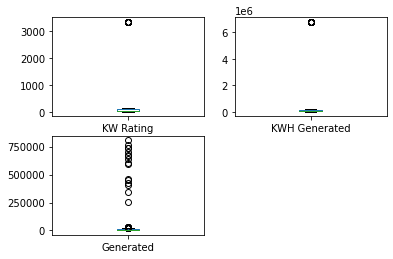

In [41]:
#Data Visualiztion
df.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey =False)
plt.show()

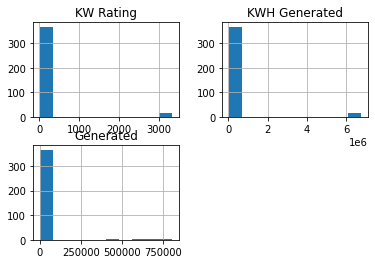

In [42]:
df.hist()
plt.show()

In [43]:
copy_df = df
f_names =set(copy_df['Facility Name'])


In [44]:
for col in copy_df.columns:
  print(col)

Facility Name
KW Rating
KWH Generated
Date
Generated
Address / Location


In [45]:
trimmed_df=copy_df.drop(['Date','Address / Location'],axis=1)

In [46]:
trimmed_df

,Facility Name,KW Rating,KWH Generated,Generated
0,Veterans Memorial Community Center,116.2,218498,22603
1,Veterans Memorial Community Center,116.2,218498,23330
2,Veterans Memorial Community Center,116.2,218498,17678
3,Veterans Memorial Community Center,116.2,218498,14427
4,Veterans Memorial Community Center,116.2,218498,10828
...,...,...,...,...
377,Ed Fountain Park,144.5,151050,20100
378,Durango Hills Community Center S,33.6,45246,2832
379,Fire Station 44,30.0,57914,6012
380,Centennial Hills Park,30.1,38876,4998


In [47]:
#creating dictionary to replace the names for easier analysis
list_loc = list(f_names)
d_loc = {}
ni = 0
for i in list_loc:
  d_loc[i] = ni
  ni += 1
print(d_loc)
#print(f_names)

{'Stupak Community Center': 0, 'West Yard - EOC': 1, 'Fire Station 43': 2, 'Ed Fountain Park': 3, 'Fire Station 8': 4, 'Fire Station 7': 5, 'All American Park': 6, 'Mirabelli Community Center': 7, 'East Yard - Fire Equipment Center': 8, 'Fire Station 44': 9, 'Fire Station 41': 10, 'East Yard - Main Gate 1': 11, 'Centennial Hills Community Center N & S': 12, 'Fire Station 6': 13, 'East Yard - Sign Shop': 14, 'WPCF Plant': 15, 'Fire Station 5': 16, 'Rainbow Park': 17, 'West Yard - Vehicle Services': 18, 'Fire Station 107': 19, 'Centennial Hills Park': 20, 'Durango Hills Community Center S': 21, 'East Las Vegas Community Center': 22, 'Lorenzi Park': 23, 'Veterans Memorial Community Center': 24, 'Fire Station 48': 25, 'Natural History Museum': 26, 'Fire Station 10': 27, 'West Yard - Operations-Maintenance': 28, 'Fire Station 45': 29, 'Fire Station 106': 30}


In [48]:
test_df = trimmed_df

In [49]:
nest_d = {'Facility Name':d_loc}
print(nest_d)

{'Facility Name': {'Stupak Community Center': 0, 'West Yard - EOC': 1, 'Fire Station 43': 2, 'Ed Fountain Park': 3, 'Fire Station 8': 4, 'Fire Station 7': 5, 'All American Park': 6, 'Mirabelli Community Center': 7, 'East Yard - Fire Equipment Center': 8, 'Fire Station 44': 9, 'Fire Station 41': 10, 'East Yard - Main Gate 1': 11, 'Centennial Hills Community Center N & S': 12, 'Fire Station 6': 13, 'East Yard - Sign Shop': 14, 'WPCF Plant': 15, 'Fire Station 5': 16, 'Rainbow Park': 17, 'West Yard - Vehicle Services': 18, 'Fire Station 107': 19, 'Centennial Hills Park': 20, 'Durango Hills Community Center S': 21, 'East Las Vegas Community Center': 22, 'Lorenzi Park': 23, 'Veterans Memorial Community Center': 24, 'Fire Station 48': 25, 'Natural History Museum': 26, 'Fire Station 10': 27, 'West Yard - Operations-Maintenance': 28, 'Fire Station 45': 29, 'Fire Station 106': 30}}


In [50]:
final_df = test_df.replace(to_replace = nest_d, value= None)

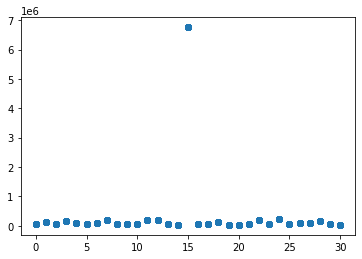

In [52]:
x1 = final_df['Facility Name']
x2 = final_df['KWH Generated']
plt.scatter(x1,x2)
plt.show()

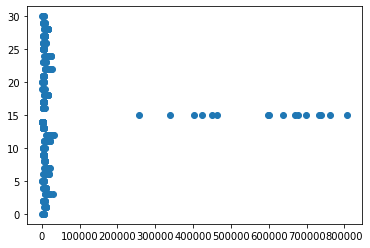

In [57]:
x1 = final_df['Generated']
x2 = final_df['Facility Name']
plt.scatter(x1,x2)
plt.show()

final_df should be used from this point onwards.
Facitlity name is the dependent variable.

# Training a model

In [17]:

array = final_df.values
print(array)

[[2.40000e+01 1.16200e+02 2.18498e+05 2.26030e+04]
 [2.40000e+01 1.16200e+02 2.18498e+05 2.33300e+04]
 [2.40000e+01 1.16200e+02 2.18498e+05 1.76780e+04]
 ...
 [9.00000e+00 3.00000e+01 5.79140e+04 6.01200e+03]
 [2.00000e+01 3.01000e+01 3.88760e+04 4.99800e+03]
 [2.80000e+01 7.93000e+01 1.46880e+05 1.09600e+04]]


In [30]:
final_df.shape

(382, 4)

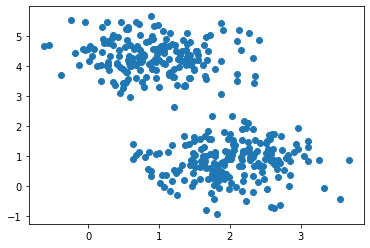

In [33]:
X, y =make_blobs(n_samples=382,centers =2,cluster_std = 0.60,random_state=0)
plt.scatter(X[:,0],X[:,1])